In [1]:
import os
import Dataset as DS
import Dataset2 as DS2
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from Style import Configure as Conf
import Measurements as M
import numpy as np
from scipy.spatial.distance import cdist
from operator import itemgetter
# from Isolation_Forest_detection import iso_forest
import re
import Confidence_Intervals as CI
import AnomalyDetection as AD

In [2]:
scenarios = ['real_panda', 'sim_panda', 'real_turtlebot3', 'sim_turtlebot3']
scenarios_results = {}

In [3]:
for scenario in scenarios:
    all_result = []
    NFOLDS = 10
    for i in range(NFOLDS):
        d = DS2.Datasets("data/"+scenario+"/normal/", "data/"+scenario+"/abnormal/", test_size=0.0, nfolds=NFOLDS, i=i)
        result = AD.my_DBSCAN(d, scenario)
        # result = AD.my_AEAD(d, scenario)
        # result = iso_forest(d, scenario)
        result.drop(['mic', 'mac'], axis=1, inplace=True)
        all_result.append(result)
    scenarios_results[scenario]=all_result

In [4]:
print(scenarios_results['real_panda'])

[                    union
normal                0.0
change_obj_weight     1.0
gripper_attack        1.0
low_net_connection    1.0
miss_bubble           1.0,                     union
normal                0.0
change_obj_weight     1.0
gripper_attack        1.0
low_net_connection    1.0
miss_bubble           1.0,                     union
normal                0.0
change_obj_weight     1.0
gripper_attack        1.0
low_net_connection    1.0
miss_bubble           1.0,                     union
normal                0.0
change_obj_weight     1.0
gripper_attack        1.0
low_net_connection    1.0
miss_bubble           1.0,                     union
normal                0.0
change_obj_weight     1.0
gripper_attack        1.0
low_net_connection    1.0
miss_bubble           1.0,                     union
normal                0.0
change_obj_weight     1.0
gripper_attack        1.0
low_net_connection    1.0
miss_bubble           1.0,                     union
normal                0.0
chang

In [5]:
print(scenarios_results['sim_panda'])

[                   union
normal          0.000000
collision       1.000000
drop_early      0.857143
gripper_attack  0.800000,                    union
normal          0.000000
collision       1.000000
drop_early      0.857143
gripper_attack  0.800000,                    union
normal          0.000000
collision       1.000000
drop_early      0.857143
gripper_attack  0.800000,                    union
normal          0.000000
collision       1.000000
drop_early      0.857143
gripper_attack  0.800000,                    union
normal          0.000000
collision       1.000000
drop_early      0.857143
gripper_attack  0.800000,                    union
normal          0.000000
collision       1.000000
drop_early      0.857143
gripper_attack  0.800000,                    union
normal          0.000000
collision       1.000000
drop_early      0.857143
gripper_attack  0.800000,                    union
normal          0.500000
collision       1.000000
drop_early      0.857143
gripper_attack  0

In [6]:
print(scenarios_results['real_turtlebot3'])

[                       union
normal              0.000000
collision           0.666667
hardware_fault      0.666667
low_net_connection  1.000000
unmapped_obstacle   0.133333
velocity_attack     0.800000,                        union
normal              0.000000
collision           0.666667
hardware_fault      0.666667
low_net_connection  1.000000
unmapped_obstacle   0.133333
velocity_attack     0.800000,                        union
normal              0.000000
collision           0.666667
hardware_fault      0.666667
low_net_connection  1.000000
unmapped_obstacle   0.133333
velocity_attack     0.800000,                        union
normal              0.000000
collision           0.666667
hardware_fault      0.666667
low_net_connection  1.000000
unmapped_obstacle   0.133333
velocity_attack     0.800000,                        union
normal              0.333333
collision           0.733333
hardware_fault      0.750000
low_net_connection  1.000000
unmapped_obstacle   0.400000
velocity_

In [7]:
print(scenarios_results['sim_turtlebot3'])

[                      union
normal             0.000000
laser_fault        0.600000
unmapped_obstacle  0.133333
velocity_attack    0.533333,                       union
normal             0.000000
laser_fault        0.200000
unmapped_obstacle  0.066667
velocity_attack    0.266667,                       union
normal             0.000000
laser_fault        0.133333
unmapped_obstacle  0.133333
velocity_attack    0.200000,                       union
normal             0.500000
laser_fault        0.400000
unmapped_obstacle  0.200000
velocity_attack    0.333333,                       union
normal             0.000000
laser_fault        0.133333
unmapped_obstacle  0.066667
velocity_attack    0.266667,                       union
normal             0.500000
laser_fault        0.666667
unmapped_obstacle  0.200000
velocity_attack    0.666667,                       union
normal             0.000000
laser_fault        0.200000
unmapped_obstacle  0.133333
velocity_attack    0.333333,             

Calculate average and standerd deviation

In [8]:
for scenario in scenarios:
    print("--------------------------  " + scenario + "   ---------------------------")
    first_run = True
    for result in scenarios_results[scenario]:
        # s_result and s2_result will be use later to calculate the average and standard deviation
        temp_result = result.copy()
        if first_run:
            s_result = temp_result
            s2_result = temp_result*temp_result
            first_run = False
        else:
            s_result += temp_result
            s2_result += temp_result*temp_result
        
    avg = s_result / NFOLDS
    std = np.sqrt(s2_result / NFOLDS - avg * avg) * NFOLDS / (NFOLDS - 1)
    
    df_combined = avg.astype(str) + " (" + std.astype(str) + ")"
    print("scenario     avg(std)")
    print(df_combined)

--------------------------  real_panda   ---------------------------
scenario     avg(std)
                        union
normal              0.0 (0.0)
change_obj_weight   1.0 (0.0)
gripper_attack      1.0 (0.0)
low_net_connection  1.0 (0.0)
miss_bubble         1.0 (0.0)
--------------------------  sim_panda   ---------------------------
scenario     avg(std)
                                                   union
normal                          0.1 (0.2222222222222222)
collision                                      1.0 (0.0)
drop_early      0.8714285714285712 (0.04761904761905078)
gripper_attack  0.8133333333333332 (0.04444444444444816)
--------------------------  real_turtlebot3   ---------------------------
scenario     avg(std)
                                                         union
normal                                0.1 (0.1697250257391052)
collision            0.6733333333333335 (0.022222222222219454)
hardware_fault                     0.725 (0.08333333333333327)
low_ne

Confidence Interval:

Confidence Interval (16.5%-83.5%):
--------------------------  real_panda   ---------------------------
 normal:  [0.0000, 0.0000], Median: 0.0000
 change_obj_weight:  [1.0000, 1.0000], Median: 1.0000
 gripper_attack:  [1.0000, 1.0000], Median: 1.0000
 low_net_connection:  [1.0000, 1.0000], Median: 1.0000
 miss_bubble:  [1.0000, 1.0000], Median: 1.0000
Plot saved to plots\real_panda.png


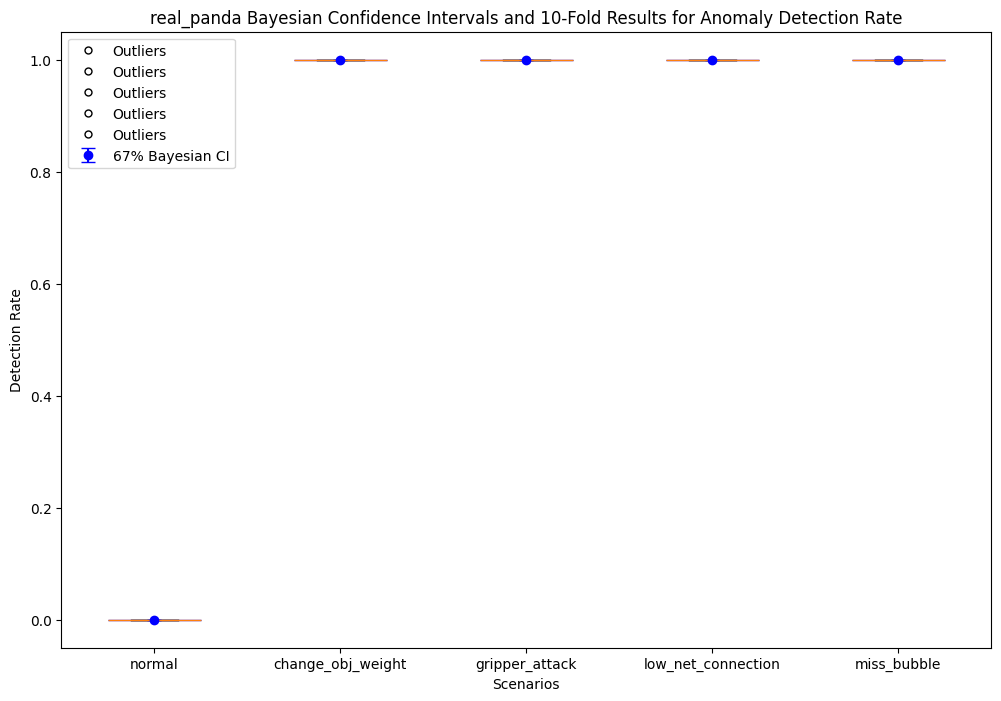

--------------------------  sim_panda   ---------------------------
 normal:  [0.0000, 0.2575], Median: 0.0000
 collision:  [1.0000, 1.0000], Median: 1.0000
 drop_early:  [0.8571, 0.8571], Median: 0.8571
 gripper_attack:  [0.8000, 0.8000], Median: 0.8000
Plot saved to plots\sim_panda.png


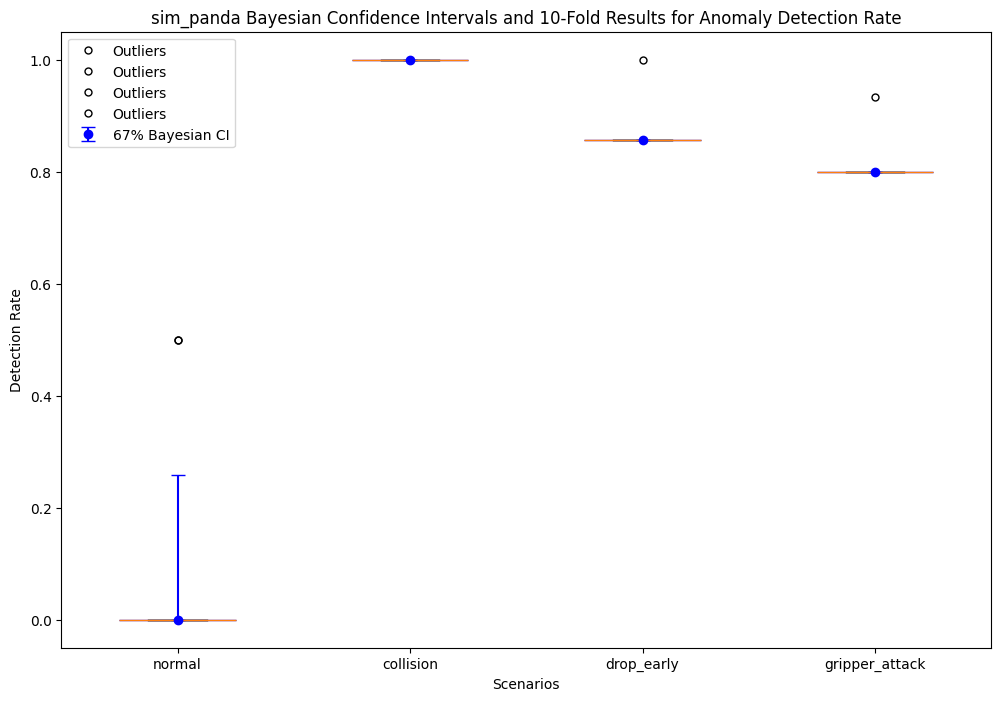

--------------------------  real_turtlebot3   ---------------------------
 normal:  [0.0000, 0.3333], Median: 0.0000
 collision:  [0.6667, 0.6667], Median: 0.6667
 hardware_fault:  [0.6667, 0.7500], Median: 0.7083
 low_net_connection:  [1.0000, 1.0000], Median: 1.0000
 unmapped_obstacle:  [0.1333, 0.2363], Median: 0.1333
 velocity_attack:  [0.8000, 0.8000], Median: 0.8000
Plot saved to plots\real_turtlebot3.png


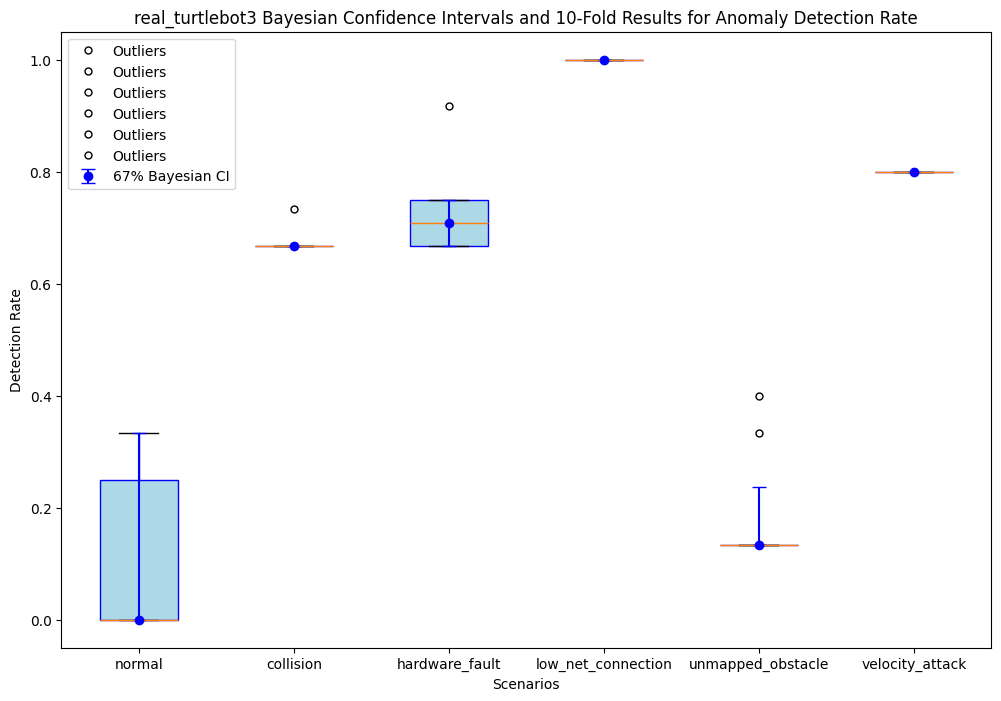

--------------------------  sim_turtlebot3   ---------------------------
 normal:  [0.0000, 0.5000], Median: 0.0000
 laser_fault:  [0.1333, 0.6000], Median: 0.3000
 unmapped_obstacle:  [0.0667, 0.1677], Median: 0.1333
 velocity_attack:  [0.2667, 0.5333], Median: 0.3333
Plot saved to plots\sim_turtlebot3.png


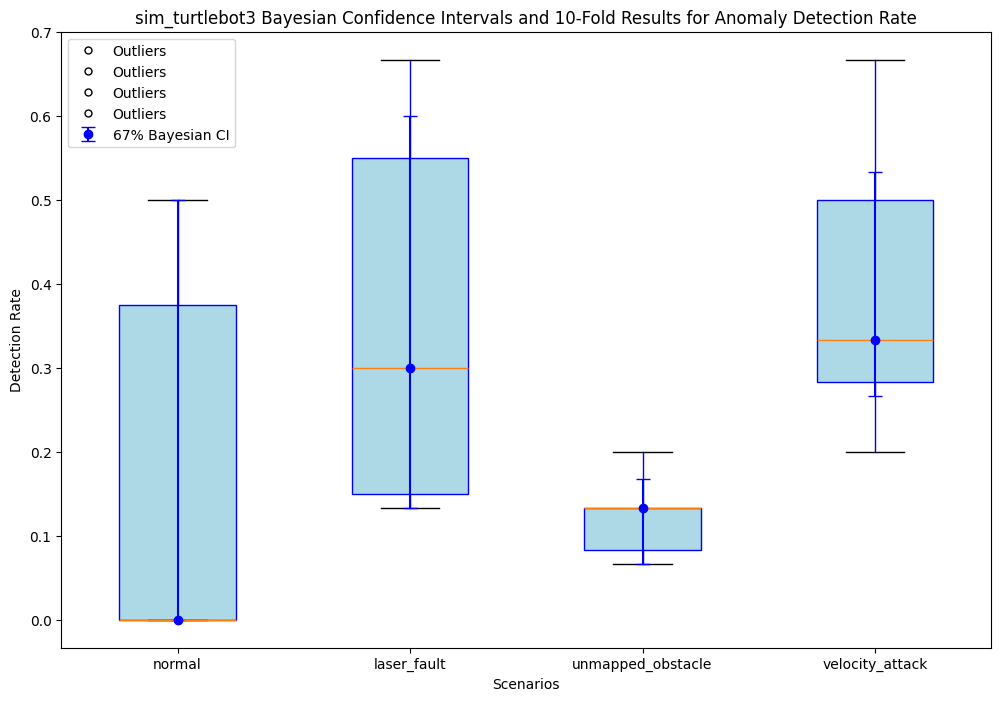

In [9]:
print ("Confidence Interval (16.5%-83.5%):")
for scenario in scenarios:
    print("--------------------------  " + scenario + "   ---------------------------")

    scenario_conf_intervals = []
    all_scenario_values = []
    scenario_labels = scenarios_results[scenario][0].index.tolist()
    for i in range(len(scenarios_results[scenario][0])):  # מספר התרחישים
        scenario_values = np.array([df.iloc[i]['union'] for df in scenarios_results[scenario]])
        all_scenario_values.append(scenario_values)
        ci_lower, median, ci_upper = CI.compute_confidence_interval(scenario_values)
        scenario_conf_intervals.append([ci_lower, median, ci_upper])
        print(f' {scenario_labels[i]}:  [{ci_lower:.4f}, {ci_upper:.4f}], Median: {median:.4f}')
    
    # הצגת הנתונים גרפית
    # CI.plot_confidence_intervals(scenario_conf_intervals, scenario_labels, scenario)
    CI.plot_all_confidence_intervals(scenario_conf_intervals, scenario_labels, all_scenario_values, scenario)